<a href="https://colab.research.google.com/github/PrestonReep/MachineLearningCrypto/blob/main/ASMRRR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h2> DS 3000 - Summer 2021</h2> </center>
<center> <h3> DS Report </h3> </center>

<center> <h3> Using Machine Learning and Financial Indicators to Determine Bitcoin Prices </h3> </center>
<center><h4>Preston Reep, Michael Reiser, & Andrew Stelmach</h4></center>

<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

We scraped the closing price and many corresponding financial indicators of Bitcoin for the last one thousand days. With this data, we hoped to train some machine learning algorithms to predict the closing price of Bitcoin given the financial indicators. This would help short-term investors who aren't trading on patterns to have a better idea of when the price will rise or fall. We also explored which of our financial indicator features were the most helpful in training the machine learning model.


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION


<h4>Problem Statement</h4>

We sought to solve the problem of unpredictable cryptocurrency prices. Cryptocurrencies are decentralized digital currencies that are built on a blockchain that ensures there are no unverified creation or transactions of the currency. This digital asset, like a stock, is valued based on market demand and supply but it is much harder to predict. Stock prices have become more predictable as the history of their prices lengthens. With the amount of cryptocurrencies and the money in them growing, we wanted to apply our new data science knowledge to the cryptocurrency data we do have. For our project, we decided to look into the cyptocurrency with the largest market cap, Bitcoin, and determine whether or not you can predict Bitcoin prices based upon technical indicators, and investment tool used by stakeholders to quantify movements of assets.

<h4>Significance of the Problem</h4>

There are many people who are unfamiliar with the technology behind crypto and therefore don't trust investing their money in it. It is seen as an unpredictable asset that cannot be relied upon to be a valid form of investing to remove unpredictably from the equation by making an effective tool to anticipate changes in price. Thus, thus machine learning algorithm can help people make money for you. With the ability to trust a machine learning algorithm, people can take advantage of the investment opportunity that crypto possesses. Our dive into crypto prediction will also provide helpful insights such as what financial indicators are the most helpful at predicting the price.

There has been a previous project done on our topic by a Derk Zomer. He used a long short-term memory model that is a form of a neural network that is capable of working in the long-term. Instead of using financial indicators as features, he used trading data which our financial indicators are calculated from, so through the transitive property we used the same features. He standardized his features and performed hyper-parameter tuning on his LSTM model but did not cite the performance of his algorithm.

Another study, "Short-term bitcoin market prediction via machine learning", conducted by Patrick Jaquart, David Dann, and Christof Meinhardt, looks into the application of machine learning in predicting future prices in short ranges, with ranges spanning from the next minute to the next hour. The use minute to minute data over the span of 9 months. They use a wide variety of data beyond simply bitcoin trading data, including twitter sentiment, other asset markets, and information of the blockchain itself. They standardized their data. To process their data, they used various forms of neural networks and gradient boosting classifier, which were not taught in DS 3000. The models ended up having a 50% - 56% accuracy, with the longer periods tending to possess a higher accuracy.

Jaquart, P., Dann, D., &amp; Weinhardt, C. (2021). Short-term bitcoin market prediction via machine learning. The Journal of Finance and Data Science, 7, 45–66. 
    https://doi.org/10.1016/j.jfds.2021.03.001 

Zomer, D.(2020, November 19). *Using machine learning to predict future bitcoin price.* Towards Data Science.
    https://towardsdatascience.com/using-machine-learning-to-predict-future-bitcoin-prices-6637e7bfa58f.


<h4>Questions</h4>

1. Is using technical indicators alone to predict Bitcoin value sufficient in generating accurate results?

2. Does the lifespan of available data have an impact on the ability to generate accurate metrics?
   
3. Can technical indicators alone predict the price of Bitcoin? If not, what else could have been added to make our data more accurate?
   
4. Will there be one machine learning algorithm that is definitively better in regards to minimizing all forms of error, or will different algorithms exceed in optimizing different forms of error?

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Read dataframe
df = pd.read_csv('https://raw.githubusercontent.com/PrestonReep/MachineLearningCrypto/main/filtered_bitcoin.csv')
df

,target,volume,trend_sma_fast,trend_sma_slow,trend_adx,volume_obv,trend_ema_fast,trend_ema_slow,trend_macd,momentum_rsi,trend_aroon_ind
0,38595.01,1766.451386,38595.010000,38595.010000,0.000000,1.766451e+03,38595.010000,38595.010000,0.000000,100.000000,0.0
1,38349.01,87771.976937,38472.010000,38472.010000,0.000000,-8.600553e+04,38557.163846,38576.787778,-19.623932,0.000000,-4.0
2,40144.04,80679.622838,39029.353333,39029.353333,0.000000,-5.325903e+03,38801.298639,38692.880535,108.418104,88.710984,4.0
3,40516.29,108522.391949,39401.087500,39401.087500,0.000000,1.031965e+05,39065.143464,38827.947903,237.195561,90.577713,8.0
4,39020.57,86921.025555,39324.984000,39324.984000,0.000000,1.627546e+04,39058.286008,38842.216206,216.069802,52.798792,8.0
...,...,...,...,...,...,...,...,...,...,...,...
995,6465.12,33484.542070,6591.512500,6571.566923,53.022131,-4.775900e+06,6581.565153,6521.284625,60.280528,47.517222,-20.0
996,6447.54,40301.029452,6577.535833,6566.083462,51.020666,-4.816201e+06,6560.945899,6515.822060,45.123838,46.665076,-20.0
997,6581.39,35305.739910,6576.462500,6565.813846,49.838311,-4.780895e+06,6564.091145,6520.678945,43.412200,53.502285,-20.0
998,6708.00,30286.229773,6582.491667,6572.703077,48.981136,-4.750609e+06,6586.230969,6534.554579,51.676390,58.872961,-20.0


### 2.1. Data Acquisition

#### Bitcoin Data

We scraped our daily Bitcoin pricing data using the AlphaVantage API. The data we scrapped includes the opening price, the closing price, the highest price, the lowest price, the volume, and the market cap for each day. The Bitcoin Data starts on September 22, 2018 and covers every day until June 17th, 2021. 
  
(Note: After reading through the AlphaVantage website, their documentation, and other resources we were unable to pinpoint exactly where this API pulls its data from. Therefore, we opted to link the API documentation itself. https://www.alphavantage.co/documentation/)

#### Technical Indicators  

From there, we were able to use the Technical Access Library to take in the values that we scrapped (opening, closing, high, low, volume) and calculate a wide variety of technical indicators. 

Documentation: https://technical-analysis-library-in-python.readthedocs.io/en/latest/. 

These technical Indicators look at a wide range of different factors that influence the value of a financial asset, such as momentum, trends, and volume. Some of the indicators in focus on how an assets value in moving, while others aim the significance of different movements and be able to effectively quantify them. Additionally, some indicators depict short term trends while other depict long term trends. We then dropped all the columns we scrapped besides for closing price and volume, and then filtered the dataframe to consist of 10 technical indicators that we wanted to explore in this report.
  
  *Link to code used to generate data:* https://github.com/PrestonReep/MachineLearningCrypto/blob/main/FP2.ipynb

  *Dataset url* = 'https://raw.githubusercontent.com/PrestonReep/MachineLearningCrypto/main/filtered_bitcoin.csv'*

#### Description of Features 
    {Name: Variable Name, Description}
1. **Volume**: volume, The amount of bitcoin that is bought and/or sold within a given time period within the entire market.
   
2. **Short Term Simple Moving Average**: trend_sma_fast, The average price given a specified period, divided by the number of periods in the data. Periods are meant to represent short term trends.
3. **Long Term Simple Moving Average**: trend_sma_slow, The average price given a specified period, divided by the number of periods in the data. Periods are meant to represent long term trends.
4. **ADX**: trend_adx, measure of the strength of a trend (0-25 being weak, 25-50 being strong, 50-75 being really strong, and 75-100 being extremely metric strong)
5. **On Balance Volume:** volume_obv, prediction of the change of price given the movement of volume
6. **Short Term Exponential Moving Average:** trend_ema_fast, A metric calculated similarly to Simple Moving Average (SMA), however is designed to be more sensitive to recent movements in price as opposed to older movements in average price. Periods are mean to represent short term trends.
7. **Long Term Exponential Moving Average:** trend_ema_slow, A metric calculated similarly to Simple Moving Average (SMA), however is designed to be more sensitive to recent movements in price as opposed to older movements in average price. Periods are mean to represent long term trends.
8. **Moving Average Convergence Divergence:** trend_macd, Subtracts a Short Term Exponential Moving Average from a Long Term Exponential Moving Average, Used to find out if movement in price is getting stronger or weaker.
9.  **Relative Strength Index** momentum_rsi, Looks at recent trading activity and determines its validity. Scores range from 0-100. This metric that shows whether a stock is being over bought (score >= 70), over sold (score =< 30), or is being bought and sold appropriately(70>score>30). 
10. **Aroon Indicator:** trend_aroon_ind, A metric that uses the time in between highs and lows in a given time period in order to determine the strength of trends.

  
***This dataset contains 11 variables and 1000 rows.***

### 2.2. Data Analysis

  #### Variables

  #### Independent Variables (feature variables)
    1.  Volume
    2.  Short Term Simple Moving Average
    3.  Long Term Simple Moving Average 
    4.  ADX
    5.  On Balance Volume
    6.  Short Term Exponential Moving Average
    7.  Long Term Exponential Moving Average
    8.  Moving Average Convergence Divergence
    9.  Relative Strength Index
    10. Aroon Indicator 

  #### Dependent Variable (target variable)
  
    11.   Bitcoin Closing Price (target) (USD)


#### Predictor Rationale
We believe that these are important predictors due to the nature of the cryptocurrency market, and how it relates to the stock market. Bitcoin is traded in a similar way to a stock, however there are some key differences. Both are given a value based on how valuable that stakeholders believe they are Though one important factor to is how Bitcoin differs itself from a stock. While a stock’s value is inherently tied to a corporation and the way they operate, Bitcoin's value is solely based on the public’s perception and use of the currency. We cannot look at the company’s finances to make our decisions, so our attention needs to be drawn to how they are traded. Additionally, the cryptocurrency market runs all day as opposed to stock markets which have a set opening and closing period. This makes it that Bitcoin is traded every second and there is no arbitrary point where a trend will be paused. Given that trends have been historically quantified in the stock market, and that the cryptocurrency market is much more susceptible to trends than the stock market, we believe that using a collection of popularly used technical indicators will be effective in predicting Bitcoin value. The actual technical indicators we selected were based on which indications were most used in the industry.

#### Machine Learning Algorithms

This is a supervised ML problem that is a regression task. It is supervised because we have features, and a target variable (price).

1. Linear regression
    * Since we are faced with a regression problem faced with multiple features, it makes most sense to use Linear regression
2. Ridge and lasso regression
    * Similar to linear regression, these 2 different variations on linear regression will impose a different penalty. We can analyze the results of these 2 models to determine which penalty is best in terms of accuracy and scoring metrics. 
3. Linear Support Vector Regression
    *  Similar to the previous models, but has much more features to tune
4.  K-nearest neighbors
    *  Many indicators are strongly correlated with the price, so we can predict the price based on the nearest indicators

## 3. RESULTS

### 3.1. Data Wrangling

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# no null or NAN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           1000 non-null   float64
 1   volume           1000 non-null   float64
 2   trend_sma_fast   1000 non-null   float64
 3   trend_sma_slow   1000 non-null   float64
 4   trend_adx        1000 non-null   float64
 5   volume_obv       1000 non-null   float64
 6   trend_ema_fast   1000 non-null   float64
 7   trend_ema_slow   1000 non-null   float64
 8   trend_macd       1000 non-null   float64
 9   momentum_rsi     1000 non-null   float64
 10  trend_aroon_ind  1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


In [ ]:
#split targets and features
def features_and_target(df):
    target = df['target']
    features = df.drop('target', axis = 1)
    return features, target

In [ ]:
features, target = features_and_target(df)
target

0      38595.01
1      38349.01
2      40144.04
3      40516.29
4      39020.57
         ...   
995     6465.12
996     6447.54
997     6581.39
998     6708.00
999     6723.05
Name: target, Length: 1000, dtype: float64

In [ ]:
features

,volume,trend_sma_fast,trend_sma_slow,trend_adx,volume_obv,trend_ema_fast,trend_ema_slow,trend_macd,momentum_rsi,trend_aroon_ind
0,1766.451386,38595.010000,38595.010000,0.000000,1.766451e+03,38595.010000,38595.010000,0.000000,100.000000,0.0
1,87771.976937,38472.010000,38472.010000,0.000000,-8.600553e+04,38557.163846,38576.787778,-19.623932,0.000000,-4.0
2,80679.622838,39029.353333,39029.353333,0.000000,-5.325903e+03,38801.298639,38692.880535,108.418104,88.710984,4.0
3,108522.391949,39401.087500,39401.087500,0.000000,1.031965e+05,39065.143464,38827.947903,237.195561,90.577713,8.0
4,86921.025555,39324.984000,39324.984000,0.000000,1.627546e+04,39058.286008,38842.216206,216.069802,52.798792,8.0
...,...,...,...,...,...,...,...,...,...,...
995,33484.542070,6591.512500,6571.566923,53.022131,-4.775900e+06,6581.565153,6521.284625,60.280528,47.517222,-20.0
996,40301.029452,6577.535833,6566.083462,51.020666,-4.816201e+06,6560.945899,6515.822060,45.123838,46.665076,-20.0
997,35305.739910,6576.462500,6565.813846,49.838311,-4.780895e+06,6564.091145,6520.678945,43.412200,53.502285,-20.0
998,30286.229773,6582.491667,6572.703077,48.981136,-4.750609e+06,6586.230969,6534.554579,51.676390,58.872961,-20.0


In [ ]:

#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 3000)


# standardize the training and test sets to prevent data leakage and everything is equal to remove outliers
X_train_standardized = StandardScaler().fit_transform(X_train)
X_test_standardized = StandardScaler().fit_transform(X_test)
X_train_standardized

array([[-1.10075593, -0.57951995, -0.59689783, ...,  0.4635497 ,
         1.86488948,  1.84261483],
       [ 0.2607394 ,  1.18248646,  1.41192128, ..., -2.26775888,
         0.09139391, -0.79200822],
       [-0.48557915,  2.92810706,  2.71370344, ...,  2.3857031 ,
         0.52542204,  1.03196158],
       ...,
       [-0.59073848, -0.5074211 , -0.49356881, ..., -0.20668853,
        -0.99041429, -0.92711709],
       [-0.34818197, -0.52316828, -0.54117634, ...,  0.13921473,
         0.09440055,  0.96440714],
       [-0.72800458, -0.39299155, -0.38086405, ...,  0.13537934,
        -0.65394422, -1.06222597]])

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#Model-based feature selection
mbselect = SelectFromModel(DecisionTreeRegressor(), threshold = 'median')

mbselect.fit(X_train_standardized, y_train)

#transform training and testing sets so only the selected features are retained
X_train_selected = mbselect.transform(X_train_standardized)
X_test_selected = mbselect.transform(X_test_standardized)

### 3.2. Data Exploration

In [ ]:
#import necessary plugins
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

#### Figure 1: Fast Vs. Slow Simple Moving Average

In [ ]:
sma = df.filter(items = ["trend_sma_fast","trend_sma_slow"])
fig = px.line(sma, title = "Fast Vs. Slow SMA", )
fig.update_xaxes(autorange = "reversed", title = "day")
fig.show()

Unsupported

**Visual Explanation: Line Plot**

In this chart we are comparing the calculated the Simple Moving Average for each day for small and large periods spanning over the entirety of our dataset, starting with the oldest date: September 22, 2018 (day 999), to the most current date: June 17th, 2021 (day 0). The fast is representing Bitcoin fundamental value in the short term while the slow is representing its fundamental value in the long term. The trend that can be seen here is that there is more variance in these metrics when there is larger changes and price. And when there is deviation, it tends to be that increases in price increase the short-term value while decreasing the long-term value. Likewise, decreases in price are shown to often increase long term value while decreasing short term value. Although this tends to be the case, it is not absolute. From 100-290, the long-term value was going up with the short-term value, and the long term value was still larger than the short term value.

![image](https://raw.githubusercontent.com/PrestonReep/MachineLearningCrypto/main/newplot%20(8).png)

#### Figure 2: Relative Strength Index vs. Aroon Indicator

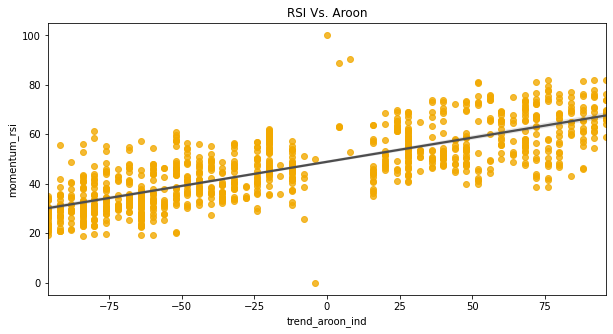

In [ ]:
plt.figure(figsize = (10,5))
r = sns.regplot(x = df.trend_aroon_ind, y = df.momentum_rsi, color = "#f2a900", 
                line_kws = {"color": "#4d4d4e"}).set_title("RSI Vs. Aroon")

**Visual Explanation: Regression Line on Scatter Plot**

In this chart we want to identify the correlation between these two variables. Both the Relative Strength Index (RSI) and the Aroon Indicator give a rating to the strength of trends in the market, however while The Aroon indicator finds this metric using the amount of time between highs and lows, the RSI looks at the strength of recent trends and aims to find if a stock is overbought and over sold. We observe a positive correlation between both variables with a small degree of variance. In this context, it means that when there is less time between highs and lows, Bitcoin tends to be oversold. As the time between highs and lows in the market increases, Bitcoin gets bought more and eventually becomes overbought. This can show that the time between high and lows is a valid metric that signal if Bitcoin is being overbought or oversold.

#### Figure 3: Bitcoin Price vs. On Balance Volume vs, Relative Strength Index

In [ ]:
fig = px.scatter_3d(df, x='volume_obv', y= 'trend_adx', z='target', color = 'target')
fig.show()

Unsupported


![image](https://raw.githubusercontent.com/PrestonReep/MachineLearningCrypto/main/newplot%20(5).png)

**Visualization Explanation: 3D Scatter Plot**

This chart compares the On Balance Volume, and the ADX to find how they influence the price of Bitcoin. On Balance volume is a prediction of a change of price and ADX is a rating of the strength of price changed. When the price of bitcoin was lower, we tended to see a weak trend, where the relationship between ADX and On-Balance column would alternate. Increasing the on-balance volume would go from increasing to decreasing the ADX. However, this changed when bitcoin reached a price of 20,000 dollars. After this point, what can be found in this chart is that the higher the on-balance volume, the lower the trends strength and the higher bitcoins price tended to get. Given that weak trends are leading to price increases, it could be inferred that this recent tend a fluke and that this price growth is unstable, and that it mainly propelled by speculation.

### 3.3. Model Training

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

linearRegression = LinearRegression()
k_regressor = KNeighborsRegressor()
support_vector = LinearSVR()
lasso = Lasso()
ridge = Ridge()

models = [linearRegression, k_regressor, support_vector, lasso, ridge]

'''
R^2 is the ratio of the total sum of squares and the residual sum of squares.
It provides a measure of how well observed outcomes are replicated by the model,
based on the proportion of total variation of outcomes explained by the model.
The mean absolute error is the mean of the absolute values of the prediction errors
of all instances in the test set
The mean squared error is the mean of all of the square of the differences between the
observed values and the predicted values when the same features are fed to the model.
They are squared so that positive and negative variances do not cancel each other out.
'''

# train the alogrithms and display scores
for model in models:
    model.fit(X_train_standardized, y_train)

print("Model Performance All Features Standardized:")
for model in models:
    print("\n" + str(model))
    print("R^2 score for training set:", model.score(X_train_standardized, y_train))
    print("R^2 score for testing set:", model.score(X_test_standardized, y_test))
    print("\tMean absolute error for training:",mean_absolute_error(y_train, model.predict(X_train_standardized)))
    print("\tMean squared error for training:",mean_squared_error(y_train, model.predict(X_train_standardized)))
    print("\tMean absolute error for testing set:",mean_absolute_error(y_test, model.predict(X_test_standardized)))
    print("\tMean squared error for testing set:",mean_squared_error(y_test, model.predict(X_test_standardized)))

# train the models with the selected features
for model in models:
    model.fit(X_train_selected, y_train)

print("\nModel Performance Model-Based Selected Features:")
for model in models:
    print("\n" + str(model))
    print("R^2 score for training set:", model.score(X_train_selected, y_train))
    print("R^2 score for testing set:", model.score(X_test_selected, y_test))
    print("\tMean absolute error for training:",mean_absolute_error(y_train, model.predict(X_train_selected)))
    print("\tMean squared error for training:",mean_squared_error(y_train, model.predict(X_train_selected)))
    print("\tMean absolute error for testing set:",mean_absolute_error(y_test, model.predict(X_test_selected)))
    print("\tMean squared error for testing set:",mean_squared_error(y_test, model.predict(X_test_selected)))
print("\nFeature names:")
print(features.columns)
print("\nBoolean mask of features:")
print(mbselect.get_support())
print("\nThe threshold value used to select the features:")
print(mbselect.threshold_)
print("\nThe importance ranking of features:")
print(mbselect.estimator_.feature_importances_)

Model Performance All Features Standardized:

LinearRegression()
R^2 score for training set: 0.9979920082052018
R^2 score for testing set: 0.9960129948600974
	Mean absolute error for training: 373.8146002738988
	Mean squared error for training: 460351.13877781987
	Mean absolute error for testing set: 517.9184195913066
	Mean squared error for testing set: 941917.4139814313

KNeighborsRegressor()
R^2 score for training set: 0.9974577438590506
R^2 score for testing set: 0.9951085706694948
	Mean absolute error for training: 428.3924373333333
	Mean squared error for training: 582836.3007173651
	Mean absolute error for testing set: 643.7545999999999
	Mean squared error for testing set: 1155584.7820589915

LinearSVR()
R^2 score for training set: -0.9012164772185283
R^2 score for testing set: -0.8866700767777551
	Mean absolute error for training: 14374.018706666668
	Mean squared error for training: 435871885.8403916
	Mean absolute error for testing set: 14473.1826
	Mean squared error for testi

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 340353774.4106515, tolerance: 17194460.404559117

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 311973397.81428516, tolerance: 17194460.404559117



### 3.4. Model Optimization


In [ ]:

'''
In the next lines of code, we find the best hyperparameters for our model.

We do this in order to see if applying a penalty can perform better than standard Linear Regression,
avoid overfitting, and minimize the loss function 
'''


k_param = {"n_neighbors" : [1,3,5,7,10,100], "weights" : ["uniform", "distance"], 
           "metric" : ["euclidean", "manhattan", "minkowski"]}

# grid search for k-neighbors params
clf = GridSearchCV(KNeighborsRegressor(), k_param)
clf.fit(X_train_standardized, y_train)
print("Best Params Courtesy of GridSearch:")
print(clf.best_params_)

estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=5, min_features_to_select=5)
selector = selector.fit(X_train_standardized, y_train)

X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(features[most_important_features], target, random_state = 3000)

# most likely don't need to do this since X_train_features are already standardized
X_train_features_standardizes = StandardScaler().fit_transform(X_train_features)
X_test_features_standardizes = StandardScaler().fit_transform(X_test_features)

# 5 most important features
print("Best Features Courtesy of GridSearch:")
print(selector.support_)
print(features.columns.to_list())
most_important_features = features.columns[selector.support_].tolist()
print("most important features: ")
print(most_important_features)
print()

linearRegression = LinearRegression()
linearRegression.fit(X_train_features_standardizes, y_train_features)
print("R^2 on test data for selected features:", end=" ")
print(linearRegression.score(X_test_features_standardizes, y_test_features))
print("Mean absolute error for selected features:",mean_absolute_error(y_test_features, linearRegression.predict(X_test_features_standardizes)))
print("Mean squared error for selected features:",mean_squared_error(y_test_features, linearRegression.predict(X_test_features_standardizes)))

params = {"C" : [0.1, 0.5, 0.7, 1, 2, 5, 10], "loss" : ["epsilon_insensitive", "squared_epsilon_insensitive"]}
clf = GridSearchCV(LinearSVR(), params)
clf.fit(X_train_standardized, y_train)
print("best params for LinearSVR:", end=" ")
print(clf.best_params_)




params = {"alpha" : [0, 0.1, 0.5, 1, 2, 5, 10], "max_iter" : [100, 1000, 10000, 100000]}
clf = GridSearchCV(Lasso(), params)
clf.fit(X_train_standardized, y_train)
print("best params for lasso regression:", end=" ")
print(clf.best_params_)

clf = GridSearchCV(Ridge(), params)
clf.fit(X_train_standardized, y_train)
print("best params for ridge regression:", end=" ")
print(clf.best_params_)



Best Params Courtesy of GridSearch:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Features Courtesy of GridSearch:
[False  True  True False  True  True  True  True  True  True]
['volume', 'trend_sma_fast', 'trend_sma_slow', 'trend_adx', 'volume_obv', 'trend_ema_fast', 'trend_ema_slow', 'trend_macd', 'momentum_rsi', 'trend_aroon_ind']
most important features: 
['trend_sma_fast', 'trend_sma_slow', 'volume_obv', 'trend_ema_fast', 'trend_ema_slow', 'trend_macd', 'momentum_rsi', 'trend_aroon_ind']

R^2 on test data for selected features: 0.9960187978803465
Mean absolute error for selected features: 517.2292621735629
Mean squared error for selected features: 940546.4687143648
best params for LinearSVR: {'C': 10, 'loss': 'squared_epsilon_insensitive'}
best params for lasso regression: {'alpha': 0, 'max_iter': 10000}
best params for ridge regression: {'alpha': 0, 'max_iter': 100}


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt

### 3.5. Model Testing

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

In [ ]:
linearRegression = LinearRegression()
k_regressor = KNeighborsRegressor(metric="manhattan", n_neighbors=3, weights='distance')
support_vector = LinearSVR(C=10, loss="squared_epsilon_insensitive")
lasso = Lasso(alpha=0, max_iter=10000)
ridge = Ridge(alpha=0, max_iter=100)

models = [linearRegression, k_regressor, support_vector, lasso, ridge]


print("\nModel Performance for tuned algorithms using testing set, trained with model-selected:")

for model in models:
    model.fit(X_train_selected, y_train)

for model in models:
    print("\n" + str(model))
    print("R^2 score for testing set:", model.score(X_test_selected, y_test))
    print("\tMean absolute error for testing set:",mean_absolute_error(y_test, model.predict(X_test_selected)))
    print("\tMean squared error for testing set:",mean_squared_error(y_test, model.predict(X_test_selected)))

for model in models:
    model.fit(X_train_standardized, y_train)

for model in models:
    print("\n" + str(model))
    print("R^2 score for testing set:", model.score(X_test_standardized, y_test))
    print("\tMean absolute error for testing set:",mean_absolute_error(y_test, model.predict(X_test_standardized)))
    print("\tMean squared error for testing set:",mean_squared_error(y_test, model.predict(X_test_standardized)))



Model Performance for tuned algorithms using testing set, trained with model-selected:

LinearRegression()
R^2 score for testing set: 0.9970429233872
	Mean absolute error for testing set: 467.73029061242516
	Mean squared error for testing set: 698600.0414691074

KNeighborsRegressor(metric='manhattan', n_neighbors=3, weights='distance')
R^2 score for testing set: 0.9971781391372683
	Mean absolute error for testing set: 418.25402202885425
	Mean squared error for testing set: 666655.7461484962

LinearSVR(C=10, loss='squared_epsilon_insensitive')
R^2 score for testing set: 0.9962364407160031
	Mean absolute error for testing set: 500.7212587926479
	Mean squared error for testing set: 889129.0338880039

Lasso(alpha=0, max_iter=10000)
R^2 score for testing set: 0.997041429727104
	Mean absolute error for testing set: 467.8381500064581
	Mean squared error for testing set: 698952.9139650419

Ridge(alpha=0, max_iter=100)
R^2 score for testing set: 0.997042923387196
	Mean absolute error for testi

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

<ipython-input-390-4689b08d7922>:13: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 181791476.5236334, tolerance: 17194460.404559117

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

<ipython-input-390-4689b08d7922>

## 4. DISCUSSION

### Summary

All in all, we scraped Bitcoin trading data and used them to calculate technical indicators. From there we extracted the indicators as features and set the bitcoin price as the target. We then scaled the data using the Standard Scaler and ran different types of feature selection, GridSearch and model-based using a DecisionTreeRegressor. Finally, we trained and tested all of the linear, k-nearest-neighbors, support vector, lasso, and ridge regression models on standardized data with, GridSearch and model-based feature selection and compared the R^2 value, mean absolute error, and mean squared error for all of the permutations.

### Interpretation

We compared a linear, k-nearest-neighbors, support vector, lasso, and ridge regression algorithms on our dataset. With all features standardized, but with no hyperparameter tuning, the Linear Regression model performed best with mean absolute error of 517. Overall, the KNeighborsRegressor model should be used for our predictive model as it performed best on our training data with a mean absolute error of 418. The best parameters were 'manhattan' metric, 3 n_neighbors, and weights based on 'distance'. Feature selection led to slightly worse results but the linear regression algorithm did perform better with a mean absolute error of about 100. Due to our findings, we conclude that using the features in the way that we outlined in the project cannot be used to accurately predict bitcoins pricing. Although we see very high r^2 even before optimizing our model, the absolute squared error was found to be greater than the value of a Bitcoin at its highest point in history. Even if we just took absolute standard error into consideration, the error is still too high to make any useful predictions. Given these issues, we can conclude that there may be issues with the features we selected themselves.


### Future Work

If we were to work on this project in the future, there would be a few aspects that we would change. First would be the number of instances that we included in our dataset. Our dataset contained 1000 rows, which was the default number that our API could generate. However, the history of Bitcoin is a lot more extensive than we had access to. Thus, we would either find a way to modify the code used in the API or find another source for our data to improve our results. This could potentially reduce our error. Additionally, we could add other features on top of these technical indicators to see if it gives us a better understand of the data. We could investigate other markets such as the stock market and the market for natural resources.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS

Andrew Stelmach
    - some data wrangling (standardized features, checked for no null/NaN values), model training, explaining and using metrics, evaluating performance in models, hyperparameter tuning, model testing

Preston Reep- scraped data, calculated technical indicators, asked questions for part 1, completed part 2, in which I explained the dataset, the variables and what they mean, laid out which variables were features and which were targets, explained the rational in our feature selection. Completed part 3.2, in which I created the graphs and interpretations. Wrote summary and future work in part 4.


Michael Reiser- Most of introduction minus the data analysis questions. Some data wrangling: model-based feature selection. Half of the model training and testing. Code block print statement formatting and some inter-code comments/headers. Most of discussion minus future work part and last sub-question of interpretation. Proofread, fixed typos, deleted some prompt questions.